<a href="https://colab.research.google.com/github/MaritzaTC/Tomato_disease_classification_using_deep_learning/blob/main/01%20-%20exploraci%C3%B3n%20de%20datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tomato leaf disease detection
---
# Exploración del dataset
## Descarga
Ve al dataset: https://www.kaggle.com/datasets/kaustubhb999/tomatoleaf/data

Haz clic en "Download" Download dataset as zip

#### En Colab, súbelo con:

In [ ]:
from google.colab import files
uploaded = files.upload()  # Selecciona el ZIP descargado

Saving archive.zip to archive.zip


### Descompirmirlo

In [ ]:
import zipfile
import os

filename = 'archive.zip'  #Nombre del archivo descargado

with zipfile.ZipFile(filename, 'r') as zip_ref:
    zip_ref.extractall('tomatoleaf')

### Definición de Rutas y Parámetros de Preprocesamiento
Este bloque define las rutas base para los conjuntos de entrenamiento y validación, y establece los parámetros de entrada que serán usados por el modelo (dimensiones de imagen y tamaño de lote).

In [ ]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

# --- Configuración con pathlib ---
DATASET_PATH = Path("/content/tomatoleaf/tomato")
TRAIN_DATASET = DATASET_PATH / "train"
VAL_DATASET = DATASET_PATH / "val"

# Parámetros de entrada
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32

### Carga de los conjuntos de entrenamiento y validación

In [ ]:
def cargar_dataset(ruta, shuffle):
    return tf.keras.utils.image_dataset_from_directory(
        ruta,
        label_mode='int',
        image_size=(IMG_HEIGHT, IMG_WIDTH),
        batch_size=BATCH_SIZE,
        shuffle=shuffle
    )

# Cargar datasets
train_dataset = cargar_dataset(TRAIN_DATASET, shuffle=True)
val_dataset = cargar_dataset(VAL_DATASET, shuffle=False)

Found 10000 files belonging to 10 classes.
Found 1000 files belonging to 10 classes.


#### Obtener nombres y cantidad de clases

In [ ]:
class_names = train_dataset.class_names
num_classes = len(class_names)
print("Nombre de las clases:", class_names)
print(f"# clases: {num_classes}")

Nombre de las clases: ['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']
# clases: 10


##### Visualizar las clases

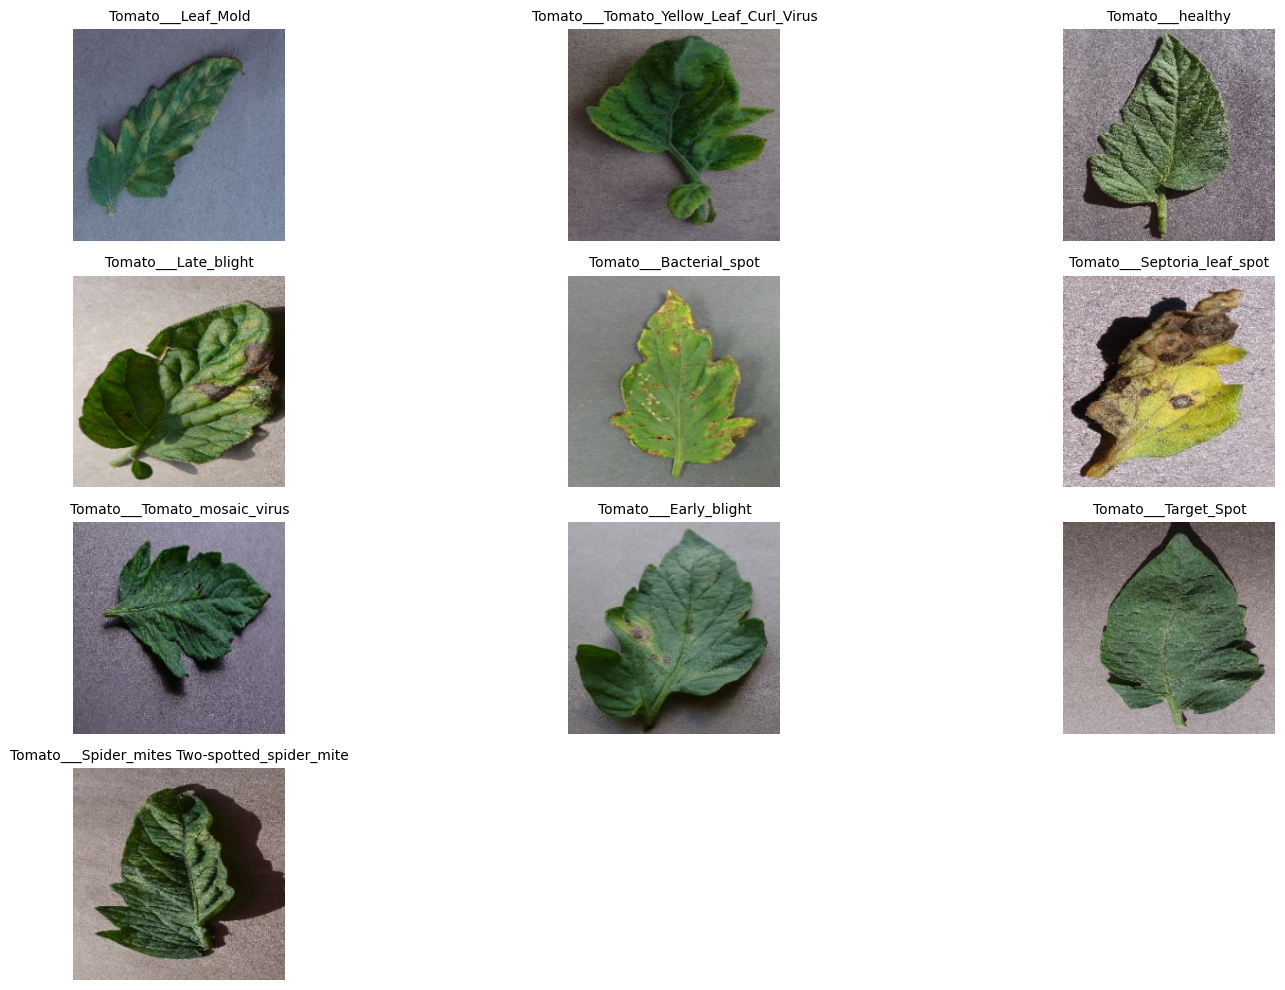

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf

# Tomar una imagen por clase (sin unbatch explícito)
imagenes_por_clase = {}
for batch in train_dataset:
    images, labels = batch
    for img, label in zip(images, labels):
        class_name = class_names[label.numpy()]
        if class_name not in imagenes_por_clase:
            imagenes_por_clase[class_name] = img
        if len(imagenes_por_clase) == len(class_names):
            break
    if len(imagenes_por_clase) == len(class_names):
        break

# Mostrar una imagen por clase
plt.figure(figsize=(15, 10))
for idx, (class_name, image) in enumerate(imagenes_por_clase.items()):
    ax = plt.subplot(4, 3, idx + 1)
    plt.imshow(image.numpy().astype("uint8"))
    plt.title(class_name, fontsize=10)
    plt.axis("off")
plt.tight_layout()
plt.show()

### Contar imágenes por clase usando las carpetas

                                               Entrenamiento  Validación
Tomato___Tomato_mosaic_virus                            1000         100
Tomato___Leaf_Mold                                      1000         100
Tomato___Septoria_leaf_spot                             1000         100
Tomato___Target_Spot                                    1000         100
Tomato___Tomato_Yellow_Leaf_Curl_Virus                  1000         100
Tomato___Late_blight                                    1000         100
Tomato___Spider_mites Two-spotted_spider_mite           1000         100
Tomato___Bacterial_spot                                 1000         100
Tomato___Early_blight                                   1000         100
Tomato___healthy                                        1000         100


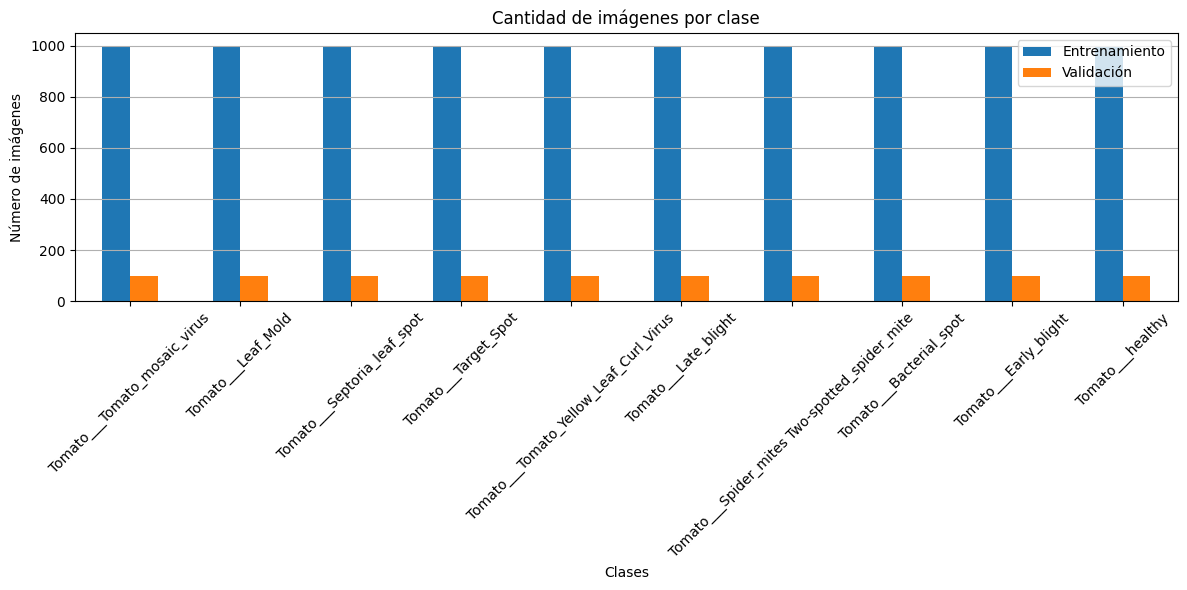

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Función para contar imágenes por clase
def contar_por_clase(ruta):
    conteo = {}
    for clase in os.listdir(ruta):
        clase_path = os.path.join(ruta, clase)
        if os.path.isdir(clase_path):
            conteo[clase] = len(os.listdir(clase_path))
    return conteo

# Contar
train_counts = contar_por_clase(TRAIN_DATASET)
val_counts = contar_por_clase(VAL_DATASET)

# Mostrar como DataFrame
df = pd.DataFrame({
    'Entrenamiento': train_counts,
    'Validación': val_counts
}).T.fillna(0).astype(int).T

print(df)

# Graficar
df.plot(kind='bar', figsize=(12, 6))
plt.title('Cantidad de imágenes por clase')
plt.ylabel('Número de imágenes')
plt.xlabel('Clases')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
